In [41]:
# layoutparser 최신 버전 설치
!pip install layoutparser torchvision && pip install "git+https://github.com/facebookresearch/detectron2.git@v0.5#egg=detectron2"
# PaddleOCR 설치
!pip install paddlepaddle-gpu==3.2.0 -i https://www.paddlepaddle.org.cn/packages/stable/cu118/
!python -m pip install "paddleocr[all]"

  Using cached layoutparser-0.3.4-py3-none-any.whl.metadata (7.7 kB)
  Using cached iopath-0.1.10-py3-none-any.whl
  Using cached pdfplumber-0.11.7-py3-none-any.whl.metadata (42 kB)
  Using cached pdf2image-1.17.0-py3-none-any.whl.metadata (6.2 kB)
  Using cached filelock-3.20.0-py3-none-any.whl.metadata (2.1 kB)
  Using cached fsspec-2025.9.0-py3-none-any.whl.metadata (10 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.8.93-py3-none-manylinux2010_x86_64.manylinux_2_12_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cuda_runtime_cu12-12.8.90-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cuda_cupti_cu12-12.8.90-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cudnn_cu12-9.10.2.21-py3-none-manylinux_2_27_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_cublas_cu12-12.8.4.1-py3-none-manylinux_2_27_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cufft_cu12-11.3.3.83-py3-none-manylinux2014_

In [42]:
# 라이브러리 불러오기
import layoutparser as lp
import cv2

In [43]:
image = cv2.imread("./book.png")
image = image[..., ::-1]
    # Convert the image from BGR (cv2 default loading style)
    # to RGB

In [44]:
model = lp.Detectron2LayoutModel("lp://PubLayNet/mask_rcnn_X_101_32x8d_FPN_3x/config",
                                 extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.5],
                                 label_map= {0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})
    # Load the deep layout model from the layoutparser API
    # For all the supported model, please check the Model
    # Zoo Page: https://layout-parser.readthedocs.io/en/latest/notes/modelzoo.html

The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


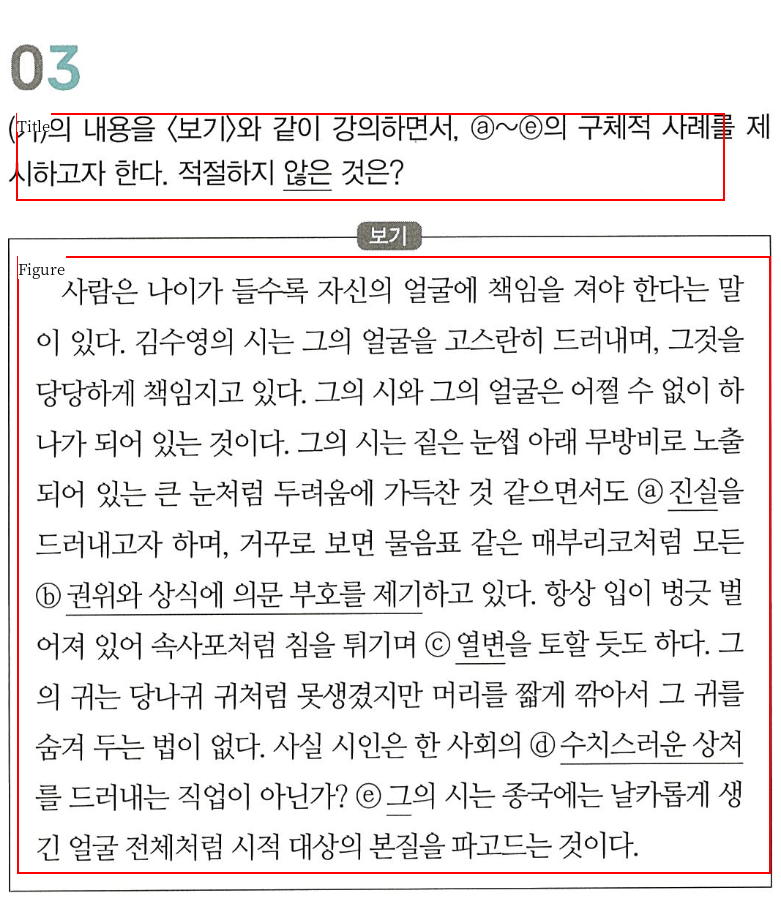

In [45]:
layout = model.detect(image)
lp.draw_box(
    image, layout, box_color="red", box_width=2, show_element_type=True
)

In [46]:
from paddleocr import PaddleOCR

RuntimeError: PDX has already been initialized. Reinitialization is not supported.

In [39]:
from paddleocr import PaddleOCR

# PP-OCRv5 모바일 모델 예시
# 기본 OCR 초기화
# use_doc_orientation_classify=False : 문서 회전 감지 off
# use_doc_unwarping=False : 이미지 구부러짐 보정 off
# use_textline_orientation=False : 텍스트라인 방향 분류 off
# -> text detection + text recognition만 수행
ocr = PaddleOCR(
    lang = "korean",
    use_doc_orientation_classify=False,
    use_doc_unwarping=False,
    use_textline_orientation=False
)

# 아래 옵션은 참고용 예시

# ocr = PaddleOCR(
#     use_doc_orientation_classify=True, 
#     use_doc_unwarping=True
# )
# -> text image preprocessing + text detection + textline orientation classification + text recognition 수행

# 또 다른 옵션 예시
# ocr = PaddleOCR(
#     use_doc_orientation_classify=False, 
#     use_doc_unwarping=False
# )
# -> text detection + textline orientation classification + text recognition 수행

# PP-OCRv5 모바일 모델을 사용하고 싶을 때
# text_detection_model_name / text_recognition_model_name 지정 가능
# use_doc_orientation_classify, use_doc_unwarping, use_textline_orientation 옵션 조절 가능
# -> Switch to PP-OCRv5_mobile models
# ocr = PaddleOCR(
#     text_detection_model_name="PP-OCRv5_mobile_det",
#     text_recognition_model_name="PP-OCRv5_mobile_rec",
#     use_doc_orientation_classify=False,
#     use_doc_unwarping=False,
#     use_textline_orientation=False
# )

RuntimeError: PDX has already been initialized. Reinitialization is not supported.

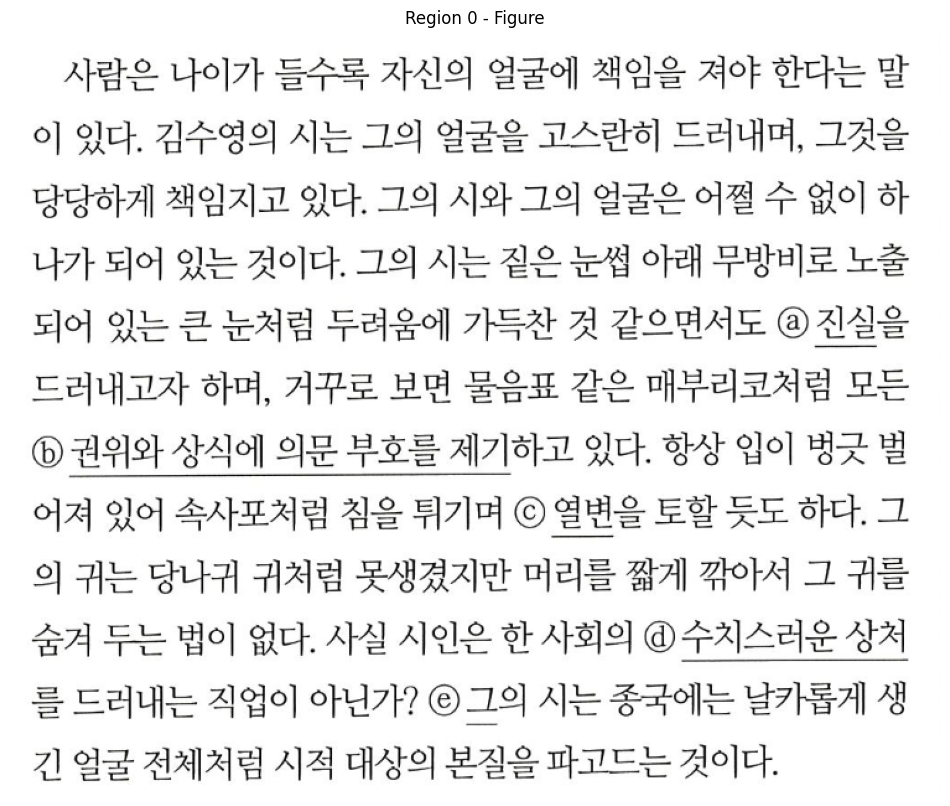

NameError: name 'ocr' is not defined

In [37]:
import matplotlib.pyplot as plt
ocr_results = []

# 1️⃣ 이미지 시각화 준비
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(image)
ax.axis("off")

# 2️⃣ LayoutParser 영역별로 OCR 수행
for i, region in enumerate(layout):
    x1, y1, x2, y2 = region.coordinates
    segment_img = image[int(y1):int(y2), int(x1):int(x2)]
    
    plt.imshow(segment_img)
    plt.title(f"Region {i} - {region.type}")
    plt.axis('off')
    plt.show()

    # PaddleOCR 예측
    result = ocr.predict(segment_img)[0]  # OCRResult 객체
    ocr_data = result.json
    ocr_block = ocr_data['res']  # dict 구조

    rec_texts = ocr_block.get("rec_texts", [])
    rec_scores = ocr_block.get("rec_scores", [])
    rec_polys = ocr_block.get("rec_polys", [])
    print(rec_texts)

In [6]:
img_path = "./book.png"
result = ocr(img_path, cls=False)
 
ocr_result = result[0]
print(ocr_result)

NameError: name 'ocr' is not defined